In [1]:
import nltk
from rouge_score import rouge_scorer
import os
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from nltk.translate.bleu_score import sentence_bleu
import torchvision.transforms as transforms
from get_loader import get_loader
import torch
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
model = torch.load('image-captioning-model.pth')
model.eval()

CNNtoRNN(
  (encoderCNN): EncoderCNN(
    (inception): Inception3(
      (Conv2d_1a_3x3): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2a_3x3): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2b_3x3): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_3b_1x1): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_4a_3x3): BasicConv2d(
        (conv): Co

In [3]:
transform = transforms.Compose(
    [
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [4]:
train_loader, dataset = get_loader(
        root_folder="flickr8k/images",
        annotation_file="flickr8k/captions.txt",
        transform=transform,
        num_workers=2,
    )

In [5]:
def Convert(string):
    li = list(string.split(" "))
    return li

In [6]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 
        

In [14]:
def metric_test(img_name,correct_caption,correct_caption_mat):
    full_path = 'test_examples/' + img_name
    img = transform(Image.open(full_path).convert("RGB")).unsqueeze(0)
    caption = ' '.join(model.caption_image(img.to('cuda'), dataset.vocab)[1:-1])
    read_img = plt.imread(full_path)
    plt.imshow(np.real(read_img))
    plt.axis("on")
    plt.title(caption)
    plt.show()
    candidate = Convert(caption)
    print(candidate)
    print('Individual 1-gram: %f' % sentence_bleu(correct_caption, candidate, weights=(1, 0, 0, 0)))
    print('Individual 2-gram: %f' % sentence_bleu(correct_caption, candidate, weights=(0, 1, 0, 0)))
    print('Individual 3-gram: %f' % sentence_bleu(correct_caption, candidate, weights=(0, 0, 1, 0)))
    print('Individual 4-gram: %f' % sentence_bleu(correct_caption, candidate, weights=(0, 0, 0, 1)))
    print ("MATEOR: ",nltk.translate.meteor_score.meteor_score(correct_caption_mat, caption))

In [ ]:
correct_caption = re.sub("[^\w]", " ",  caption).split()
correct_caption_mat = ['A small canoe in the lake']
img_name = 'boat.png'
metric_test(img_name,correct_caption,correct_caption_mat)

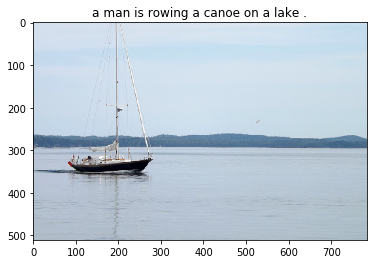

['a', 'man', 'is', 'rowing', 'a', 'canoe', 'on', 'a', 'lake', '.']
Individual 1-gram: 0.100000
Individual 2-gram: 0.000000
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000
MATEOR:  0.234375


In [18]:
correct_caption = [['A' ,'small', 'canoe', 'in',' lake']]
correct_caption_mat = ['A small canoe in the lake']
img_name = 'boat.png'
metric_test(img_name,correct_caption,correct_caption_mat)

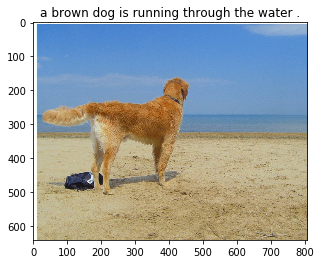

['a', 'brown', 'dog', 'is', 'running', 'through', 'the', 'water', '.']
Individual 1-gram: 0.111111
Individual 2-gram: 0.000000
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000
MATEOR:  0.46296296296296297


In [33]:
correct_caption = [['A','Brown','Dog' ,'on',' beach',  'by' ,'the', 'ocean']]
correct_caption_mat = ['A Brown Dog on  beach by the ocean']
img_name = 'dog.jpg'

metric_test(img_name,correct_caption,correct_caption_mat)

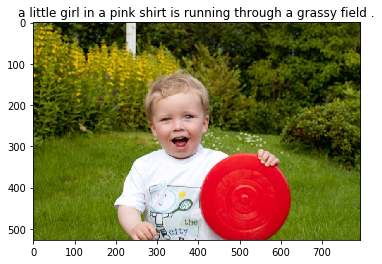

['a', 'little', 'girl', 'in', 'a', 'pink', 'shirt', 'is', 'running', 'through', 'a', 'grassy', 'field', '.']
Individual 1-gram: 0.000000
Individual 2-gram: 0.000000
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000
MATEOR:  0.0


In [24]:
correct_caption = [['A','Child','holding' ,'red',' frisbee',  'outdoors' ]]
correct_caption_mat = ['Child holding red frisbee outdoors']
img_name = 'child_play.jpg'

metric_test(img_name,correct_caption,correct_caption_mat)

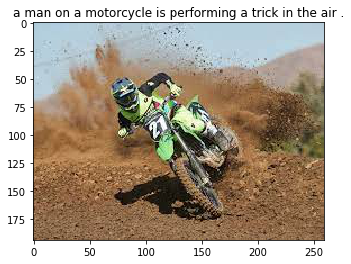

['a', 'man', 'on', 'a', 'motorcycle', 'is', 'performing', 'a', 'trick', 'in', 'the', 'air', '.']
Individual 1-gram: 0.692308
Individual 2-gram: 0.583333
Individual 3-gram: 0.454545
Individual 4-gram: 0.300000
MATEOR:  0.815289256198347


In [30]:
correct_caption = [['A','man','on' ,'a',' dirt',  'bike' ,'performing', 'a','trick','in','the','air']]
correct_caption_mat = ['A man on a dirt bike performing a trick in the air.']
img_name = 'biker.jpg'

metric_test(img_name,correct_caption,correct_caption_mat)